In [1]:
import numpy as numpy
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append(str(Path.cwd().parent))
import heisensim as sim
import scripts.positions as poslib
import scripts.simlib as simlib
PATH = Path.cwd().parent

In [4]:
def pick_points(sampler, limit):
    points = sampler.sample_positions(1)
    try:
        while points.shape[0] < limit:
            points = sampler._append_to_pos(points)
    except RuntimeError:
        pass
    return points.shape[0]

def point_ratio(geom, dim, rho, N=20, it=100, seed=5):
    np.random.seed(seed)
    sampler = simlib.SAMPLING_GENERATORS[geom](N=N, rho=rho, dim=dim)
    total = 0
    for i in range(it):
        total += pick_points(sampler, N)
    return total/(N*it)

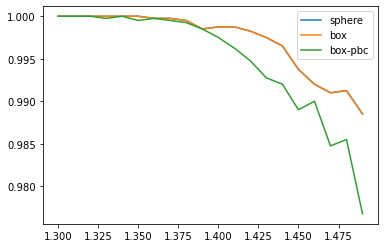

In [19]:
#cutoff rho=1.25
d = 1
rhos = np.round(np.arange(1.3, 1.5, 0.005), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=20, it=200) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

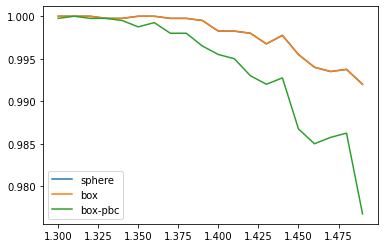

In [20]:
d = 1
rhos = np.round(np.arange(1.3, 1.5, 0.005), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=10, it=400) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

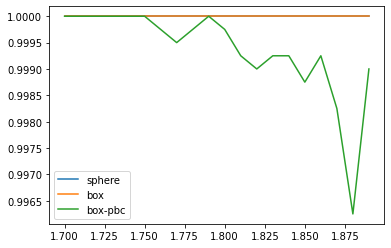

In [17]:
# cutoff rho = 1.7
d = 2
rhos = np.round(np.arange(1.7, 1.9, 0.01), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=20, it=200) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

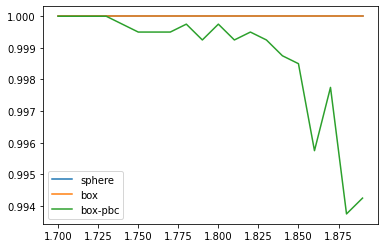

In [18]:
d = 2
rhos = np.round(np.arange(1.7, 1.9, 0.01), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=10, it=400) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

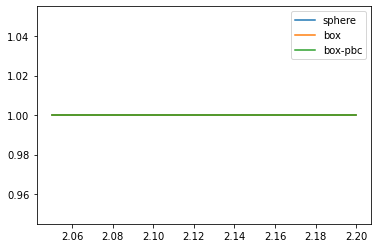

In [24]:
d = 3
rhos = np.round(np.arange(2.05, 2.2, 0.025), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=20, it=200) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

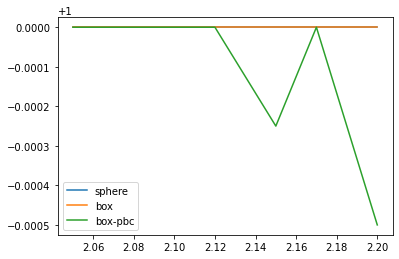

In [23]:
d = 3
# cutoff -> rho=2.0
rhos = np.round(np.arange(2.05, 2.2, 0.025), 2)

for geom in simlib.SAMPLING_GEOMETRIES:
    ratios = [point_ratio(geom, d, rho, N=10, it=400) for rho in rhos]
    plt.plot(rhos, ratios, label=geom)

plt.legend()
plt.show()

## Noisy chain

In [2]:
def chainSuccessRate(N, sigma, spacing, trys=1000):
    chain = sim.NoisyChain(sigma = sigma, spacing=spacing)

    successes = trys
    for _ in range(trys):
        try:
            chain.sample_positions(N)
        except RuntimeError:
            successes -= 1
    return successes/trys

Spacings       : [1.01 1.09 1.17 1.25 1.32 1.4  1.48 1.56 1.64 1.72 1.79 1.87 1.95 2.03
 2.11 2.19 2.26 2.34 2.42 2.5 ]
Corresp. Rhos  : [1.98 1.84 1.71 1.61 1.51 1.43 1.35 1.28 1.22 1.17 1.11 1.07 1.03 0.99
 0.95 0.91 0.88 0.85 0.83 0.8 ]


Text(0.5, 1.0, 'Noisy chain with 8 atoms')

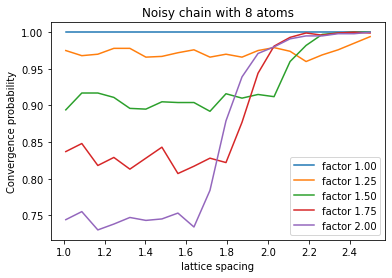

In [3]:
N = 8
trys=1000
spacing_space = np.linspace(1.01, 2.5, 20)
factors = [1.0, 1.25, 1.5, 1.75, 2.0]

curves = np.zeros((len(factors), len(spacing_space)))
for j, spacing in enumerate(spacing_space):
    for i, factor in enumerate(factors):
        curves[i,j] = chainSuccessRate(N, factor * (spacing-1), spacing,trys=trys)

print(f"Spacings       : {str(np.round(spacing_space,2))}")
print(f"Corresp. Rhos  : {str(np.round(2/spacing_space, 2))}")

lines = plt.plot(spacing_space, curves.T)
plt.legend(lines, list(map(lambda x: f"factor {x:.2f}", factors)))
plt.xlabel("lattice spacing")
plt.ylabel("Convergence probability")
plt.title(f"Noisy chain with {N} atoms")

Spacings       : [1.01 1.26 1.5  1.75 2.  ]
Corresp. Rhos  : [1.98 1.59 1.33 1.14 1.  ]


Text(0.5, 1.0, 'Convergence with N')

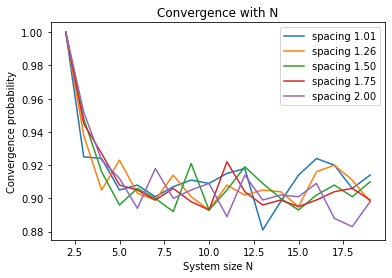

In [4]:
N_space = np.arange(2,20)
trys=1000
spacing_space = np.linspace(1.01, 2.0, 5)
factor = 1.5

curves = np.zeros((len(spacing_space), len(N_space)))
for j, N in enumerate(N_space):
    for i, spacing in enumerate(spacing_space):
        curves[i,j] = chainSuccessRate(N, factor * (spacing-1), spacing,trys=trys)

print(f"Spacings       : {str(np.round(spacing_space,2))}")
print(f"Corresp. Rhos  : {str(np.round(2/spacing_space, 2))}")

lines = plt.plot(N_space, curves.T)
plt.legend(lines, list(map(lambda x: f"spacing {x:.2f}", spacing_space)))
plt.xlabel("System size N")
plt.ylabel("Convergence probability")
plt.title(f"Convergence with N")